C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


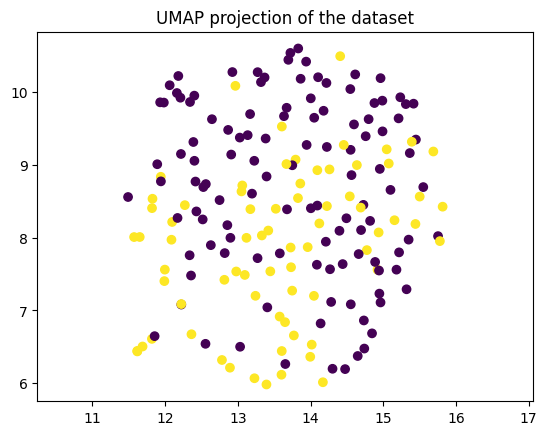

In [1]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df = pd.read_csv("final_genotipos_GERAL_RISK.csv")
df = df.dropna(axis='columns', how='any')
df = df.drop('patient_id', axis='columns')

X = df.drop('risk', axis='columns')
y = df['risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler()),
    ('selector', RFE(SVC(kernel='linear', random_state=42), n_features_to_select=50)),  # O RFE so foi treinado no X_train na visualizacao
])

X_train = pipeline.fit_transform(X_train, y_train)
X_test = pipeline.transform(X_test)

reducer = umap.UMAP(random_state=42)
X_embedded = reducer.fit_transform(X_train)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train, cmap='viridis')
plt.gca().set_aspect('equal', 'datalim')
plt.title("UMAP projection of the dataset")
plt.show()